In [3]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(11)
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame
from sklearn.tree import plot_tree

import keras
import tensorflow as tf
from PIL import Image
import cv2

from tqdm import tqdm
from random import shuffle 

import os
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical 

# specifically for cnn
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, Conv1D, MaxPooling2D, BatchNormalization,MaxPool1D,MaxPool2D

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.optimizer_v1 import adam

# **chargement des images**

In [4]:
X=[] #contient les images
Z=[] #contient les labels pour chaque image
IMG_SIZE=224  #taille de l'image
#chemins des images pour chaque classe
DIR0=r'C:\Users\hp\BDSaS\Multimidia_Mining\Projet\voc\automobile' 
DIR1=r'C:\Users\hp\BDSaS\Multimidia_Mining\Projet\voc\plane'
DIR2=r'C:\Users\hp\BDSaS\Multimidia_Mining\Projet\voc\train'

In [5]:
#associer un label a chaque image
def assign_label(img,DIR_type):
    return DIR_type

In [6]:
#chargement des images dans la liste X 
def make_train_data(DIR_type,DIR):
  
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,DIR_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
make_train_data("automobile",DIR0)
print(len(X))

100%|██████████| 81/81 [00:00<00:00, 169.11it/s]

81


In [8]:
make_train_data("plane",DIR1)
print(len(X))

100%|██████████| 80/80 [00:00<00:00, 216.09it/s]

161


In [9]:
make_train_data("train",DIR2)
print(len(X))

100%|██████████| 80/80 [00:00<00:00, 184.35it/s]

241


# **Visualisation**

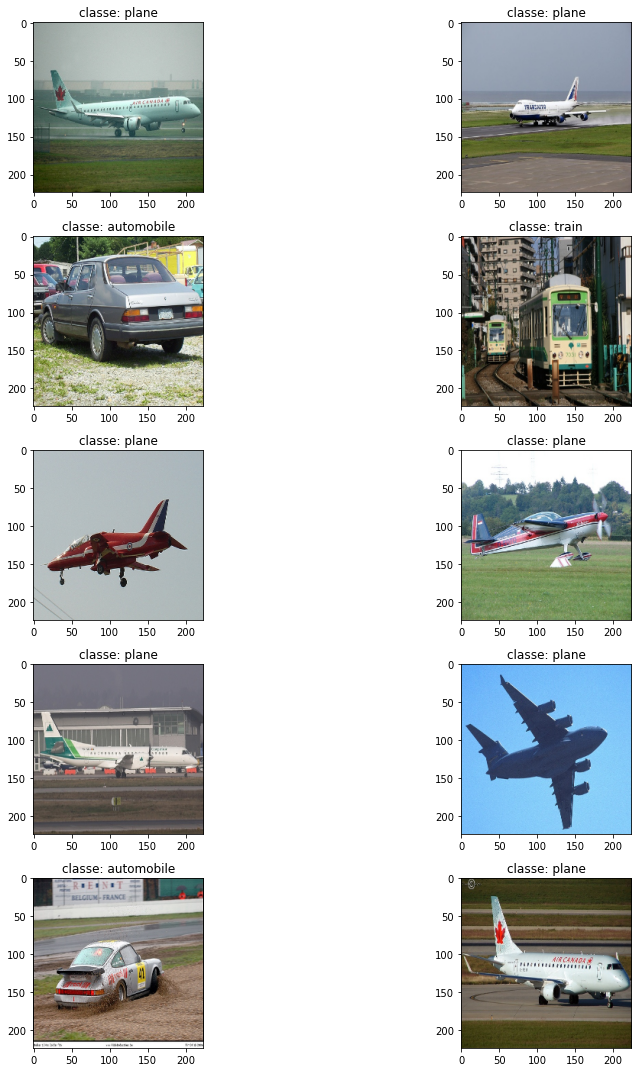

In [10]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('classe: '+Z[l])
        
plt.tight_layout()

# **Label Encoding**

In [11]:
#encoder les labels par exemple une image qui un label train ==> le label sera encoder comme suit [0,0,1] ['automobile','plane','train']
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,3) #convertir les images en un array de pixels 
X=np.array(X)
X=X/255 #standardiser les images

plane
[0. 1. 0.]


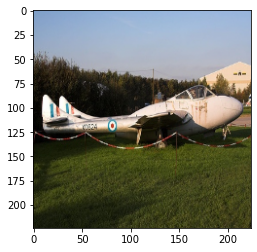

In [12]:
print(Z[90])
plt.imshow(X[90])
print(Y[90])

# **Construction et entraînement du modèle**

In [13]:
#split data (train and test)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=42) 

In [19]:
np.random.seed(42)
rn.seed(42)

In [20]:
# # modelling starts using a CNN.

m = Sequential()

m.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
m.add(MaxPooling2D(pool_size=(2,2)))

m.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

m.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
m.add(Dropout(0.5))

m.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


m.add(Flatten())
m.add(Dense(units = 512, activation='relu'))
m.add(Dense(3, activation = "softmax"))

In [21]:
# compiler le modèle m avec obtimizer = adam et loss=categorical_crossentropy
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [22]:
# Fit the model
history=m.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
8/8 [==============================] - 5s 550ms/step - loss: 1.7620 - accuracy: 0.3158 - val_loss: 1.1002 - val_accuracy: 0.0769
Epoch 2/30
8/8 [==============================] - 4s 488ms/step - loss: 1.0903 - accuracy: 0.3596 - val_loss: 1.1082 - val_accuracy: 0.0769
Epoch 3/30
8/8 [==============================] - 4s 483ms/step - loss: 1.0523 - accuracy: 0.4035 - val_loss: 1.0888 - val_accuracy: 0.2308
Epoch 4/30
8/8 [==============================] - 4s 488ms/step - loss: 0.9342 - accuracy: 0.5439 - val_loss: 0.8887 - val_accuracy: 0.6923
Epoch 5/30
8/8 [==============================] - 4s 503ms/step - loss: 0.7779 - accuracy: 0.6360 - val_loss: 0.7142 - val_accuracy: 0.6923
Epoch 6/30
8/8 [==============================] - 4s 511ms/step - loss: 0.6248 - accuracy: 0.7368 - val_loss: 0.6363 - val_accuracy: 0.7692
Epoch 7/30
8/8 [==============================] - 4s 540ms/step - loss: 0.5673 - accuracy: 0.7675 - val_loss: 0.5995 - val_accuracy: 0.7692
Epoch 8/30
8/8 [====

# **Evaluation sur les données de test**

In [23]:
m.evaluate(x_test,y_test)

1/1 [==============================] - 0s 71ms/step - loss: 0.6181 - accuracy: 0.8462


[0.6181386113166809, 0.8461538553237915]

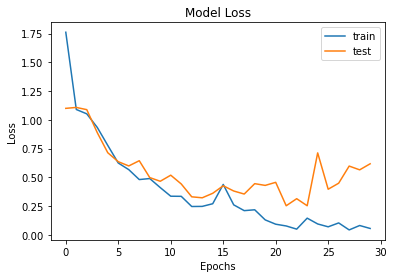

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

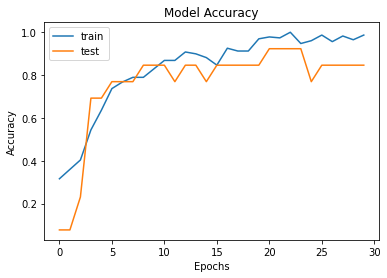

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Prédiction**

In [26]:
#cette fonction affiche les vraies classes et les classes prédites pour chaque image 
def evaluate_prediction(i):
  labels = ["automobile","plane","train"]
  if i in range(0,len(y_test)):
    pred=m.predict(x_test[i].reshape(-1,224,224,3))
    pred_arg=np.argmax(pred)
    plt.imshow(x_test[i])
    plt.title("Predicted class : "+labels[pred_arg]+"\n"+
          "Actual class : "+labels[np.argmax(y_test[i])])
  else :
    print("out of range of test data !!!")

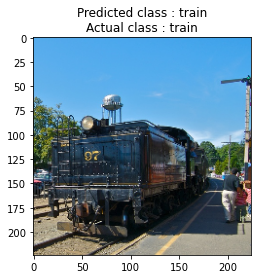

In [27]:
evaluate_prediction(2)